# Statistics Analysis and Filtering Tool

This notebook reads the statistics CSV generated by `stats_data.py` and provides:
1. Overall statistics tables
2. Per-year statistics tables
3. Functions to filter movies by plot/summary length
4. Functions to find movies with all features present


In [52]:
"""
Statistics Analysis and Filtering

This notebook provides tools for analyzing movie statistics and filtering data.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path
from typing import Dict, List, Tuple, Optional
import warnings
warnings.filterwarnings('ignore')

# Add parent directorssies to path
try:
    BASE_DIR = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
    if BASE_DIR not in sys.path:
        sys.path.insert(0, BASE_DIR)
except NameError:
    BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
    if BASE_DIR not in sys.path:
        sys.path.insert(0, BASE_DIR)

DATA_DIR = os.path.join(BASE_DIR, 'data')
STATS_FILE = os.path.join(DATA_DIR, 'data_statistics.csv')

print(f"Base directory: {BASE_DIR}")
print(f"Data directory: {DATA_DIR}")
print(f"Stats file: {STATS_FILE}")
print(f"Stats file exists: {os.path.exists(STATS_FILE)}")


Base directory: /home/nab/Niklas/GroupDataLiteracy
Data directory: /home/nab/Niklas/GroupDataLiteracy/data
Stats file: /home/nab/Niklas/GroupDataLiteracy/data/data_statistics.csv
Stats file exists: True


In [53]:
# Import functions from stats_data.py to load movie data
from stats_data import load_all_data, find_year_files

# Load statistics CSV
stats_df = pd.read_csv(STATS_FILE)
print(f"Loaded statistics CSV with {len(stats_df)} rows")
print(f"\nStatistics CSV columns: {list(stats_df.columns)}")
print(f"\nScopes available: {stats_df['scope'].unique()}")
print(f"\nYears available: {sorted(stats_df[stats_df['scope'] == 'Per-Year']['year'].unique())}")


Loaded statistics CSV with 2784 rows

Statistics CSV columns: ['scope', 'year', 'field', 'total_movies', 'present', 'missing', 'percentage', 'avg_length', 'min_length', 'max_length']

Scopes available: ['Overall' 'Per-Year']

Years available: ['1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '202

In [54]:
# Separate overall and per-year statistics
overall_stats = stats_df[stats_df['scope'] == 'Overall'].copy()
per_year_stats = stats_df[stats_df['scope'] == 'Per-Year'].copy()

print(f"Overall statistics: {len(overall_stats)} rows")
print(f"Per-year statistics: {len(per_year_stats)} rows")

# Display overall statistics table
print("\n" + "="*100)
print("OVERALL STATISTICS")
print("="*100)

# Create a formatted table for overall stats
overall_display = overall_stats[['field', 'present', 'missing', 'percentage', 'avg_length', 'min_length', 'max_length']].copy()
overall_display['percentage'] = overall_display['percentage'].apply(lambda x: f"{x:.2f}%")
overall_display['avg_length'] = overall_display['avg_length'].apply(lambda x: f"{x:.2f}" if pd.notna(x) else "N/A")
overall_display['min_length'] = overall_display['min_length'].apply(lambda x: f"{int(x)}" if pd.notna(x) else "N/A")
overall_display['max_length'] = overall_display['max_length'].apply(lambda x: f"{int(x)}" if pd.notna(x) else "N/A")

# Rename columns for better display
overall_display.columns = ['Field', 'Present', 'Missing', 'Percentage', 'Avg Length', 'Min Length', 'Max Length']

display(overall_display)


Overall statistics: 29 rows
Per-year statistics: 2755 rows

OVERALL STATISTICS


,Field,Present,Missing,Percentage,Avg Length,Min Length,Max Length
0,movie_id,141119,0,100.00%,8.40,4,10
1,country,138264,2855,97.98%,10.97,4,237
2,imdb_id,137125,3994,97.17%,9.07,9,10
3,duration,79499,61620,56.33%,2.39,1,5
4,duration_all,79499,61620,56.33%,2.48,1,20
5,actors_id,108527,32592,76.90%,64.34,3,3101
6,actors,108527,32592,76.90%,112.87,1,4548
7,directors_id,128578,12541,91.11%,8.58,4,427
8,directors,128578,12541,91.11%,14.64,1,658
9,genre_id,118524,22595,83.99%,12.63,4,223


In [55]:
# Group yearly statistics into decades and average within each decade

# We'll group 'actors' and 'directors' together and report their average as one column.
# We'll ignore 'imdb_id' and 'tmdb_id' completely.

key_fields = ['directors', 'actors', 'genre', 'plot', 'duration', 
              'popularity', 'vote_count']

# Ensure year is integer, in case it's read as string
per_year_stats = per_year_stats.copy()  # Avoid SettingWithCopyWarning
per_year_stats['year'] = pd.to_numeric(per_year_stats['year'], errors='coerce')
per_year_stats = per_year_stats.dropna(subset=['year'])
per_year_stats['year'] = per_year_stats['year'].astype(int)

# Only use the relevant fields (excluding imdb_id and tmdb_id)
filtered_stats = per_year_stats[per_year_stats['field'].isin(key_fields)]

# Pivot table by year
per_year_pivot = filtered_stats.pivot_table(
    index='year',
    columns='field',
    values='percentage',
    fill_value=0
)
per_year_pivot = per_year_pivot.sort_index()

# Compute combined 'Actors & Director' column by averaging those two
per_year_pivot['Actors+Director'] = per_year_pivot[['actors', 'directors']].mean(axis=1)

# Remove 'actors' and 'director'; keep 'Actors+Director'
cols_order = [col for col in per_year_pivot.columns if col not in ['actors', 'directors']]
# Move 'Actors+Director' to the first column (for visibility)
cols_order = ['Actors+Director'] + [c for c in cols_order if c != 'Actors+Director']
per_year_pivot = per_year_pivot[cols_order]

# Create a decade column from the year index (now guaranteed numeric)
decade_bins = (per_year_pivot.index // 10) * 10
per_year_pivot['decade'] = decade_bins

# Group by decade and compute the mean for each key field in the decade/combined field
per_decade_pivot = per_year_pivot.groupby('decade').mean(numeric_only=True)
per_decade_pivot.index = [f"{int(dec)}s" for dec in per_decade_pivot.index]

# Add a final 'Average' row for the grand mean
per_decade_pivot.loc['Average'] = per_decade_pivot.mean(axis=0)

print("\n" + "="*100)
print("PER-DECADE STATISTICS (Average Percentage Completeness by Decade)")
print("="*100)

display(per_decade_pivot)

# Save the per-decade pivot as a CSV in the data folder
per_decade_pivot.to_csv(os.path.join(DATA_DIR, "per_decade_stats.csv"))



PER-DECADE STATISTICS (Average Percentage Completeness by Decade)


field,Actors+Director,duration,genre,plot,popularity,vote_count
1930s,89.4290,43.4320,92.5760,99.9510,93.2040,93.2040
1940s,87.1670,50.5380,87.6960,99.9900,91.8610,91.8610
1950s,91.3170,64.7270,87.9640,99.9810,91.9200,91.9200
1960s,90.2955,63.8850,82.4920,99.9890,89.0770,89.0770
1970s,89.9450,57.2400,78.2490,99.9920,89.0520,89.0520
1980s,88.8755,53.2530,77.1480,99.9920,87.5720,87.5720
1990s,87.2925,55.9350,82.8810,100.0000,89.2820,89.2820
2000s,82.6430,57.8040,85.9180,99.9880,88.5340,88.5340
2010s,75.1855,54.7780,85.2540,99.9260,90.4480,90.4480
2020s,74.1920,62.5100,77.2480,100.0000,95.7080,95.7080


In [56]:
# Also show total movies per year
movies_per_year = per_year_stats.groupby('year')['total_movies'].first().sort_index()

print("\n" + "="*80)
print("MOVIES PER YEAR")
print("="*80)

year_counts_df = pd.DataFrame({
    'Year': movies_per_year.index,
    'Total Movies': movies_per_year.values
})

display(year_counts_df)

print(f"\nTotal movies across all years: {movies_per_year.sum():,}")
print(f"Number of years: {len(movies_per_year)}")
print(f"Average movies per year: {movies_per_year.mean():.0f}")
print(f"Year with most movies: {movies_per_year.idxmax()} ({movies_per_year.max():,} movies)")
print(f"Year with least movies: {movies_per_year.idxmin()} ({movies_per_year.min():,} movies)")



MOVIES PER YEAR


,Year,Total Movies
0,1930,758
1,1931,908
2,1932,952
3,1933,944
4,1934,1015
...,...,...
90,2020,1666
91,2021,1785
92,2022,1826
93,2023,1970



Total movies across all years: 141,119
Number of years: 95
Average movies per year: 1485
Year with most movies: 2015 (3,427 movies)
Year with least movies: 1945 (695 movies)


## Load Actual Movie Data for Filtering

Now we'll load the actual movie data so we can filter by plot length and feature completeness.


In [57]:
# Load all movie data
print("Loading all movie data files...")
combined_df, year_dataframes = load_all_data(DATA_DIR)

print(f"\nLoaded {len(combined_df):,} total movies")
print(f"Years available: {sorted(year_dataframes.keys())}")
print(f"\nColumns in dataset: {list(combined_df.columns)}")

# Check which text column is available
has_plot = 'plot' in combined_df.columns
has_summary = 'summary' in combined_df.columns

if has_plot:
    text_column = 'plot'
    print(f"\nUsing 'plot' column for text analysis ({combined_df['plot'].notna().sum():,} movies have plots)")
elif has_summary:
    text_column = 'summary'
    print(f"\nUsing 'summary' column for text analysis ({combined_df['summary'].notna().sum():,} movies have summaries)")
else:
    text_column = None
    print("\nWarning: No 'plot' or 'summary' column found!")


2025-11-24 19:04:07,658 - stats_data - INFO - Found 95 year files
2025-11-24 19:04:07,673 - stats_data - INFO - Year 1930: Loaded 758 movies from wikidata_movies_1930.csv
2025-11-24 19:04:07,691 - stats_data - INFO - Year 1931: Loaded 908 movies from wikidata_movies_1931.csv


Loading all movie data files...


2025-11-24 19:04:07,713 - stats_data - INFO - Year 1932: Loaded 952 movies from wikidata_movies_1932.csv
2025-11-24 19:04:07,731 - stats_data - INFO - Year 1933: Loaded 944 movies from wikidata_movies_1933.csv
2025-11-24 19:04:07,752 - stats_data - INFO - Year 1934: Loaded 1015 movies from wikidata_movies_1934.csv
2025-11-24 19:04:07,771 - stats_data - INFO - Year 1935: Loaded 1050 movies from wikidata_movies_1935.csv
2025-11-24 19:04:07,793 - stats_data - INFO - Year 1936: Loaded 1167 movies from wikidata_movies_1936.csv
2025-11-24 19:04:07,814 - stats_data - INFO - Year 1937: Loaded 1141 movies from wikidata_movies_1937.csv
2025-11-24 19:04:07,833 - stats_data - INFO - Year 1938: Loaded 1000 movies from wikidata_movies_1938.csv
2025-11-24 19:04:07,853 - stats_data - INFO - Year 1939: Loaded 968 movies from wikidata_movies_1939.csv
2025-11-24 19:04:07,873 - stats_data - INFO - Year 1940: Loaded 999 movies from wikidata_movies_1940.csv
2025-11-24 19:04:07,893 - stats_data - INFO - Year


Loaded 141,119 total movies
Years available: [1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

Columns in dataset: ['movie_id', 'country', 'imdb_id', 'duration', 'duration_all', 'actors_id', 'actors', 'directors_id', 'directors', 'genre_id', 'genre', 'release_date', 'wikidata_class', 'wikipedia_link', 'title', 'summary', 'set_in_period', 'awards', 'budget', 'budget_currency', 'box_office', 'box_office_currency', 'box_office_worldwide', 'box_office_worldwide_currency', 'pop

In [58]:
def is_field_present(df: pd.DataFrame, field: str) -> pd.Series:
    """
    Check if a field is present (non-null and non-empty) for each row.
    """
    if field not in df.columns:
        return pd.Series([False] * len(df), index=df.index)
    
    if df[field].dtype == 'object':
        # For string fields, check for non-null and non-empty strings
        return df[field].notna() & (df[field].astype(str).str.strip() != '') & (df[field].astype(str) != 'nan')
    else:
        return df[field].notna()


def filter_by_plot_length(df: pd.DataFrame, min_length: int = None, max_length: int = None, 
                          text_column: str = None) -> pd.DataFrame:
    """
    Filter movies by plot/summary length.
    
    Args:
        df: DataFrame with movie data
        min_length: Minimum plot length in characters (inclusive)
        max_length: Maximum plot length in characters (inclusive)
        text_column: Column name for text ('plot' or 'summary'), auto-detects if None
    
    Returns:
        Filtered DataFrame
    """
    if text_column is None:
        if 'plot' in df.columns:
            text_column = 'plot'
        elif 'summary' in df.columns:
            text_column = 'summary'
        else:
            raise ValueError("No 'plot' or 'summary' column found in DataFrame")
    
    if text_column not in df.columns:
        raise ValueError(f"Column '{text_column}' not found in DataFrame")
    
    # Calculate text lengths
    text_lengths = df[text_column].astype(str).str.len()
    
    # Apply filters
    mask = pd.Series([True] * len(df), index=df.index)
    
    if min_length is not None:
        mask = mask & (text_lengths >= min_length)
    
    if max_length is not None:
        mask = mask & (text_lengths <= max_length)
    
    # Also filter out null/empty values
    has_text = is_field_present(df, text_column)
    mask = mask & has_text
    
    filtered_df = df[mask].copy()
    filtered_df['plot_length'] = text_lengths[mask]
    
    return filtered_df


def count_by_plot_length(df: pd.DataFrame, min_length: int, max_length: int, 
                        text_column: str = None) -> int:
    """
    Count movies with plot/summary length between min_length and max_length.
    """
    filtered = filter_by_plot_length(df, min_length, max_length, text_column)
    return len(filtered)


def filter_all_features_present(df: pd.DataFrame, required_fields: List[str] = None) -> pd.DataFrame:
    """
    Filter movies where all specified features are present.
    
    Args:
        df: DataFrame with movie data
        required_fields: List of field names that must be present. 
                        If None, uses all non-year fields.
    
    Returns:
        Filtered DataFrame with only movies having all required fields
    """
    if required_fields is None:
        # Use all fields except 'year' and internal columns
        required_fields = [col for col in df.columns 
                          if col not in ['year', 'plot_length']]
    
    # Check which fields are available
    available_fields = [f for f in required_fields if f in df.columns]
    missing_fields = [f for f in required_fields if f not in df.columns]
    
    if missing_fields:
        print(f"Warning: Fields not found in DataFrame: {missing_fields}")
    
    if not available_fields:
        print("Warning: No available fields to check!")
        return df.iloc[0:0].copy()  # Return empty DataFrame
    
    print(f"Checking {len(available_fields)} fields: {available_fields}")
    
    # Create mask for all fields present
    mask = pd.Series([True] * len(df), index=df.index)
    
    for field in available_fields:
        field_mask = is_field_present(df, field)
        mask = mask & field_mask
    
    filtered_df = df[mask].copy()
    
    # Print summary
    print(f"\nOriginal movies: {len(df):,}")
    print(f"Movies with all required fields: {len(filtered_df):,}")
    print(f"Percentage: {len(filtered_df)/len(df)*100:.2f}%")
    
    return filtered_df


def get_plot_length_stats(df: pd.DataFrame, text_column: str = None) -> Dict:
    """
    Get statistics about plot/summary lengths.
    """
    if text_column is None:
        if 'plot' in df.columns:
            text_column = 'plot'
        elif 'summary' in df.columns:
            text_column = 'summary'
        else:
            return {}
    
    if text_column not in df.columns:
        return {}
    
    # Calculate lengths only for non-empty values
    has_text = is_field_present(df, text_column)
    text_lengths = df[has_text][text_column].astype(str).str.len()
    
    if len(text_lengths) == 0:
        return {}
    
    return {
        'count': len(text_lengths),
        'mean': text_lengths.mean(),
        'median': text_lengths.median(),
        'std': text_lengths.std(),
        'min': text_lengths.min(),
        'max': text_lengths.max(),
        'q25': text_lengths.quantile(0.25),
        'q75': text_lengths.quantile(0.75),
        'q90': text_lengths.quantile(0.90),
        'q95': text_lengths.quantile(0.95)
    }

print("Helper functions defined:")
print("  - filter_by_plot_length(): Filter movies by plot/summary length")
print("  - count_by_plot_length(): Count movies in a length range")
print("  - filter_all_features_present(): Filter movies with all features present")
print("  - get_plot_length_stats(): Get statistics about plot lengths")


Helper functions defined:
  - filter_by_plot_length(): Filter movies by plot/summary length
  - count_by_plot_length(): Count movies in a length range
  - filter_all_features_present(): Filter movies with all features present
  - get_plot_length_stats(): Get statistics about plot lengths


## Plot Length Statistics

Let's see the distribution of plot/summary lengths to help you decide on filtering ranges.



PLOT LENGTH STATISTICS


,Value
count,141082.00
mean,1310.93
median,629.00
std,1456.58
min,9.00
max,22552.00
q25,283.00
q75,1976.00
q90,3656.00
q95,4180.00



Key insights:
  - 141,082 movies have plots
  - Mean length: 1311 characters
  - Median length: 629 characters
  - 25th percentile: 283 characters
  - 75th percentile: 1976 characters
  - 95th percentile: 4180 characters


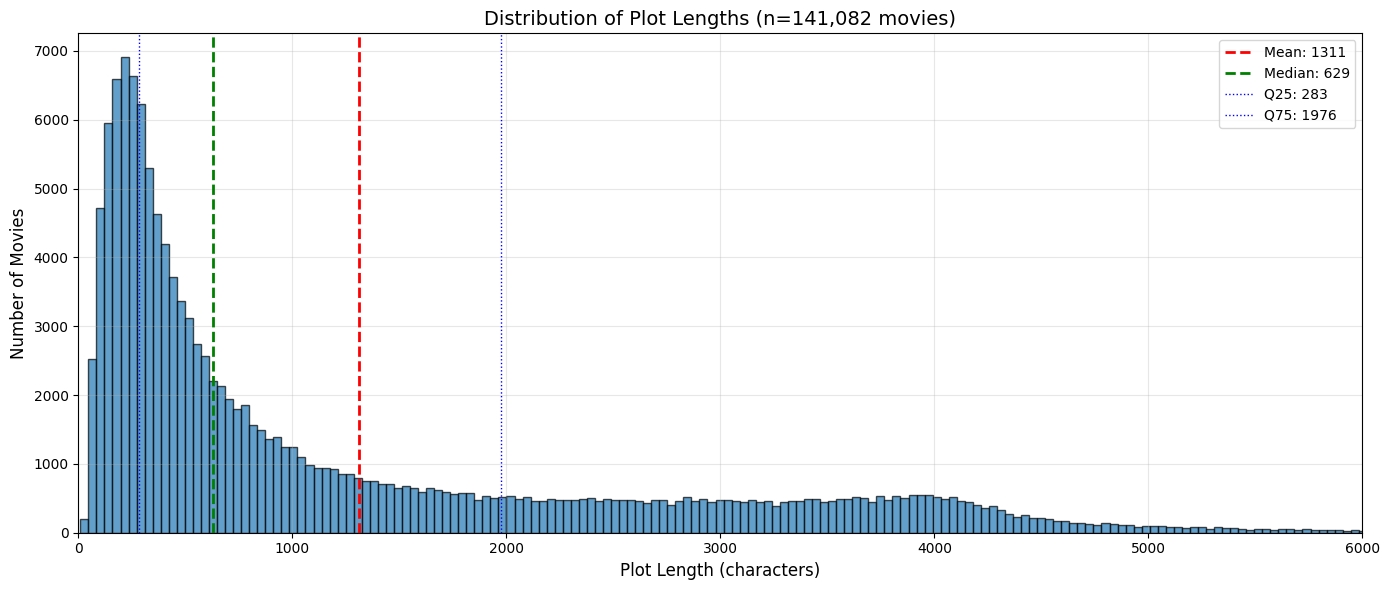

In [59]:
# Get plot length statistics
if text_column:
    length_stats = get_plot_length_stats(combined_df, text_column)
    
    if length_stats:
        print(f"\n{text_column.upper()} LENGTH STATISTICS")
        print("="*80)
        
        stats_df = pd.DataFrame([length_stats]).T
        stats_df.columns = ['Value']
        stats_df['Value'] = stats_df['Value'].apply(lambda x: f"{x:.2f}" if isinstance(x, float) else f"{int(x):,}")
        
        display(stats_df)
        
        print(f"\nKey insights:")
        print(f"  - {length_stats['count']:,} movies have {text_column}s")
        print(f"  - Mean length: {length_stats['mean']:.0f} characters")
        print(f"  - Median length: {length_stats['median']:.0f} characters")
        print(f"  - 25th percentile: {length_stats['q25']:.0f} characters")
        print(f"  - 75th percentile: {length_stats['q75']:.0f} characters")
        print(f"  - 95th percentile: {length_stats['q95']:.0f} characters")
        
        # Create a histogram
        has_text = is_field_present(combined_df, text_column)
        text_lengths = combined_df[has_text][text_column].astype(str).str.len()
        
        plt.figure(figsize=(14, 6))
        plt.hist(text_lengths, bins=600, edgecolor='black', alpha=0.7)
        plt.xlabel(f'{text_column.capitalize()} Length (characters)', fontsize=12)
        plt.ylabel('Number of Movies', fontsize=12)
        plt.title(f'Distribution of {text_column.capitalize()} Lengths (n={length_stats["count"]:,} movies)', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.xlim(0, 6000)  # Limit x-axis to a maximum of 6000
        
        # Add vertical lines for key statistics
        plt.axvline(length_stats['mean'], color='red', linestyle='--', linewidth=2, label=f'Mean: {length_stats["mean"]:.0f}')
        plt.axvline(length_stats['median'], color='green', linestyle='--', linewidth=2, label=f'Median: {length_stats["median"]:.0f}')
        plt.axvline(length_stats['q25'], color='blue', linestyle=':', linewidth=1, label=f'Q25: {length_stats["q25"]:.0f}')
        plt.axvline(length_stats['q75'], color='blue', linestyle=':', linewidth=1, label=f'Q75: {length_stats["q75"]:.0f}')
        
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("No text column available for analysis")
else:
    print("No plot or summary column found in the data")


## Example Usage: Filtering Movies

Here are some example queries you can run. Modify the parameters as needed.


In [60]:
# Example 1: Count movies with plot length between 500 and 2000 characters
if text_column:
    min_len = 500
    max_len = 2000
    count = count_by_plot_length(combined_df, min_len, max_len, text_column)
    print(f"Movies with {text_column} length between {min_len} and {max_len} characters: {count:,}")
    print(f"Percentage of total: {count/len(combined_df)*100:.2f}%")
    
    # Show some examples
    filtered = filter_by_plot_length(combined_df, min_len, max_len, text_column)
    print(f"\nSample movies in this range (first 5):")
    sample = filtered[['title', 'year', 'plot_length']].head()
    display(sample)


Movies with plot length between 500 and 2000 characters: 44,985
Percentage of total: 31.88%

Sample movies in this range (first 5):


,title,year,plot_length
2,Anna Christie,1930,859
3,À propos de Nice,1930,653
8,The Divorcee,1930,1757
15,Romance,1930,1007
17,Under the Roofs of Paris,1930,1198


In [61]:
# Example 2: Count movies with plot length >= 1000 characters (medium to long plots)
if text_column:
    min_len = 1000
    count = count_by_plot_length(combined_df, min_len, None, text_column)
    print(f"Movies with {text_column} length >= {min_len} characters: {count:,}")
    print(f"Percentage of total: {count/len(combined_df)*100:.2f}%")
    
    # Breakdown by year
    filtered = filter_by_plot_length(combined_df, min_len, None, text_column)
    year_breakdown = filtered.groupby('year').size().sort_index()
    print(f"\nBreakdown by year (first 10 years):")
    year_df = pd.DataFrame({
        'Year': year_breakdown.index[:10],
        'Count': year_breakdown.values[:10]
    })
    display(year_df)


Movies with plot length >= 1000 characters: 54,217
Percentage of total: 38.42%

Breakdown by year (first 10 years):


,Year,Count
0,1930,206
1,1931,220
2,1932,214
3,1933,242
4,1934,240
5,1935,275
6,1936,266
7,1937,252
8,1938,243
9,1939,252


In [62]:
# Example 3: Find movies with all key features present
key_features = ['title', 'directors', 'actors', 'genre', 'plot', 'duration', 
                'imdb_id', 'popularity', 'vote_average']

complete_movies = filter_all_features_present(combined_df, key_features)

print(f"\nSample of complete movies (first 5):")
sample_complete = complete_movies[['title', 'year', 'directors', 'genre']].head()
display(sample_complete)


Checking 9 fields: ['title', 'directors', 'actors', 'genre', 'plot', 'duration', 'imdb_id', 'popularity', 'vote_average']

Original movies: 141,119
Movies with all required fields: 65,355
Percentage: 46.31%

Sample of complete movies (first 5):


,title,year,directors,genre
0,The Blue Angel,1930,Josef von Sternberg,"drama film, film based on literature"
1,Abraham Lincoln,1930,D. W. Griffith,"drama film, war film, biographical film, histo..."
2,Anna Christie,1930,Clarence Brown,"drama film, romance film"
4,All Quiet on the Western Front,1930,Lewis Milestone,"drama film, war film, film based on a novel"
5,The Big House,1930,George W. Hill,"drama film, prison film, crime film, romance film"


In [63]:
# Example 4: Combine filters - Movies with all features AND plot length >= 1000
if text_column:
    # First filter by features
    key_features = ['title', 'director', 'actors', 'genre', 'plot']
    complete_movies = filter_all_features_present(combined_df, key_features)
    
    # Then filter by plot length
    min_plot_len = 1000
    filtered_combined = filter_by_plot_length(complete_movies, min_plot_len, None, text_column)
    
    print(f"\nMovies with all key features AND {text_column} length >= {min_plot_len}:")
    print(f"Count: {len(filtered_combined):,}")
    print(f"Percentage of total: {len(filtered_combined)/len(combined_df)*100:.2f}%")
    
    # Show breakdown by year
    year_breakdown = filtered_combined.groupby('year').size().sort_index()
    print(f"\nBreakdown by year:")
    year_df = pd.DataFrame({
        'Year': year_breakdown.index,
        'Count': year_breakdown.values
    })
    display(year_df)


Checking 4 fields: ['title', 'actors', 'genre', 'plot']

Original movies: 141,119
Movies with all required fields: 94,679
Percentage: 67.09%

Movies with all key features AND plot length >= 1000:
Count: 41,827
Percentage of total: 29.64%

Breakdown by year:


,Year,Count
0,1930,182
1,1931,198
2,1932,193
3,1933,219
4,1934,216
...,...,...
90,2020,480
91,2021,413
92,2022,505
93,2023,518


## Interactive Analysis Section

Use the cells below to perform custom analyses. You can modify the parameters to explore different filtering criteria.


In [64]:
# CUSTOM FILTER 2: Filter by feature completeness
# Modify this list to specify which fields must be present
REQUIRED_FIELDS = ['title', 'director', 'actors', 'genre', 'plot', 'duration', 'imdb_id']

complete_movies = filter_all_features_present(combined_df, REQUIRED_FIELDS)

print(f"\nFields required: {REQUIRED_FIELDS}")
print(f"Movies with all required fields: {len(complete_movies):,}")

# Show completeness breakdown by year
if len(complete_movies) > 0:
    year_breakdown = complete_movies.groupby('year').size().sort_index()
    total_by_year = combined_df.groupby('year').size()
    
    completeness_df = pd.DataFrame({
        'Year': year_breakdown.index,
        'Complete': year_breakdown.values,
        'Total': [total_by_year.get(y, 0) for y in year_breakdown.index],
    })
    completeness_df['Percentage'] = (completeness_df['Complete'] / completeness_df['Total'] * 100).round(2)
    
    print(f"\nCompleteness by year (first 15 years):")
    display(completeness_df.head(15))
    
    print(f"\nOverall completeness: {len(complete_movies)/len(combined_df)*100:.2f}%")
    print(f"Average completeness per year: {completeness_df['Percentage'].mean():.2f}%")


Checking 6 fields: ['title', 'actors', 'genre', 'plot', 'duration', 'imdb_id']

Original movies: 141,119
Movies with all required fields: 66,466
Percentage: 47.10%

Fields required: ['title', 'director', 'actors', 'genre', 'plot', 'duration', 'imdb_id']
Movies with all required fields: 66,466

Completeness by year (first 15 years):


,Year,Complete,Total,Percentage
0,1930,282,758,37.20
1,1931,358,908,39.43
2,1932,356,952,37.39
3,1933,366,944,38.77
4,1934,405,1015,39.90
5,1935,409,1050,38.95
6,1936,465,1167,39.85
7,1937,471,1141,41.28
8,1938,424,1000,42.40
9,1939,455,968,47.00



Overall completeness: 47.10%
Average completeness per year: 48.48%


In [65]:
# CUSTOM FILTER 3: Combine both filters
# Movies with all features AND specific plot length range

# Step 1: Define required features
REQUIRED_FIELDS = ['title', 'directors', 'actors', 'genre', 'plot']

# Step 2: Filter by features
complete_movies = filter_all_features_present(combined_df, REQUIRED_FIELDS)

# Step 3: Filter by plot length (modify as needed)
MIN_PLOT_LENGTH = 500  # or None
MAX_PLOT_LENGTH = 2000  # or specify a number

if text_column and len(complete_movies) > 0:
    final_filtered = filter_by_plot_length(complete_movies, MIN_PLOT_LENGTH, MAX_PLOT_LENGTH, text_column)
    
    print(f"\nFinal filtered dataset:")
    print(f"  Original movies: {len(combined_df):,}")
    print(f"  After feature filter: {len(complete_movies):,}")
    print(f"  After plot length filter: {len(final_filtered):,}")
    print(f"  Final percentage: {len(final_filtered)/len(combined_df)*100:.2f}%")
    
    if len(final_filtered) > 0:
        print(f"\nSummary statistics:")
        print(f"  Years: {final_filtered['year'].min()} to {final_filtered['year'].max()}")
        print(f"  Average plot length: {final_filtered['plot_length'].mean():.0f} characters")
        
        # Show sample
        print(f"\nSample movies (first 10):")
        sample = final_filtered[['title', 'year', 'directors', 'genre', 'plot_length']].head(10)
        display(sample)


Checking 5 fields: ['title', 'directors', 'actors', 'genre', 'plot']

Original movies: 141,119
Movies with all required fields: 92,080
Percentage: 65.25%

Final filtered dataset:
  Original movies: 141,119
  After feature filter: 92,080
  After plot length filter: 28,419
  Final percentage: 20.14%

Summary statistics:
  Years: 1930 to 2024
  Average plot length: 1050 characters

Sample movies (first 10):


,title,year,directors,genre,plot_length
2,Anna Christie,1930,Clarence Brown,"drama film, romance film",859
8,The Divorcee,1930,Robert Z. Leonard,"drama film, romantic comedy, film based on lit...",1757
15,Romance,1930,Clarence Brown,"drama film, romance film",1007
17,Under the Roofs of Paris,1930,René Clair,musical film,1198
18,St. Jorgen's Day,1930,Yakov Protazanov,"comedy film, silent film",1511
19,Earth,1930,Oleksandr Dovzhenko,"drama film, silent film",1707
20,The Dawn Patrol,1930,Howard Hawks,"drama film, action film, war film",1939
21,Song of the Flame,1930,Alan Crosland,musical film,1871
22,Westfront 1918,1930,Georg Wilhelm Pabst,"drama film, silent film",1871
23,Feet First,1930,Clyde Bruckman,comedy film,791


## Additional Analysis Functions

Here are more analysis functions you might find useful.


In [66]:
def analyze_completeness_by_year(df: pd.DataFrame, fields: List[str]) -> pd.DataFrame:
    """
    Analyze how completeness of fields varies by year.
    """
    results = []
    
    for year in sorted(df['year'].unique()):
        year_df = df[df['year'] == year]
        total = len(year_df)
        
        row = {'year': year, 'total_movies': total}
        for field in fields:
            if field in df.columns:
                present = is_field_present(year_df, field).sum()
                row[field] = present
                row[f'{field}_pct'] = (present / total * 100) if total > 0 else 0
            else:
                row[field] = 0
                row[f'{field}_pct'] = 0
        
        results.append(row)
    
    return pd.DataFrame(results)


def get_field_completeness_summary(df: pd.DataFrame) -> pd.DataFrame:
    """
    Get a summary of field completeness across the entire dataset.
    """
    fields = [col for col in df.columns if col not in ['year', 'plot_length']]
    summary = []
    
    total_movies = len(df)
    
    for field in fields:
        present = is_field_present(df, field).sum()
        summary.append({
            'field': field,
            'present': present,
            'missing': total_movies - present,
            'percentage': (present / total_movies * 100) if total_movies > 0 else 0
        })
    
    summary_df = pd.DataFrame(summary).sort_values('percentage', ascending=False)
    return summary_df


def compare_fields_by_year(df: pd.DataFrame, field1: str, field2: str) -> pd.DataFrame:
    """
    Compare two fields to see overlap (both present, one present, neither present).
    """
    has_field1 = is_field_present(df, field1)
    has_field2 = is_field_present(df, field2)
    
    both = (has_field1 & has_field2).sum()
    only_1 = (has_field1 & ~has_field2).sum()
    only_2 = (~has_field1 & has_field2).sum()
    neither = (~has_field1 & ~has_field2).sum()
    total = len(df)
    
    comparison = pd.DataFrame({
        'Category': [
            f'Both {field1} and {field2}',
            f'Only {field1}',
            f'Only {field2}',
            'Neither'
        ],
        'Count': [both, only_1, only_2, neither],
        'Percentage': [
            (both / total * 100),
            (only_1 / total * 100),
            (only_2 / total * 100),
            (neither / total * 100)
        ]
    })
    
    comparison['Percentage'] = comparison['Percentage'].round(2)
    return comparison

print("Additional analysis functions defined:")
print("  - analyze_completeness_by_year(): Analyze field completeness by year")
print("  - get_field_completeness_summary(): Get overall completeness summary")
print("  - compare_fields_by_year(): Compare two fields' overlap")


Additional analysis functions defined:
  - analyze_completeness_by_year(): Analyze field completeness by year
  - get_field_completeness_summary(): Get overall completeness summary
  - compare_fields_by_year(): Compare two fields' overlap


In [67]:
# Example: Get overall field completeness summary
completeness_summary = get_field_completeness_summary(combined_df)
print("Field Completeness Summary:")
print("="*80)
display(completeness_summary)


Field Completeness Summary:


,field,present,missing,percentage
0,movie_id,141119,0,100.000000
12,wikidata_class,141119,0,100.000000
11,release_date,141119,0,100.000000
14,title,141119,0,100.000000
13,wikipedia_link,141119,0,100.000000
28,plot,141082,37,99.973781
1,country,138264,2855,97.976885
2,imdb_id,137125,3994,97.169765
8,directors,128578,12541,91.113174
7,directors_id,128578,12541,91.113174
